## **Importing the csv into dataframe**
importing relevant libraries


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import neptune

In [7]:
# import neptune

# run = neptune.init_run(
#     project="cyrilpeh/Capstone-testing",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2YjkzM2UwOS01ZjZjLTQwOTEtYmM0Ni01NGM4YTAwM2VlMjgifQ==",
#     monitoring_namespace="monitoring"
# )  # your credentials

### Log hyperparameters

In [8]:
# params = {
#     "model": "Logistic Regression",
#     "random_state": 123,
#     "scaler": "StandardScaler"
# }
# run["parameters"] = params

In [9]:
telco_df = pd.read_csv('Telco_dataset.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Checking for any null or nan values in the dataset

In [11]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

To check the number of churns in the dataset

In [12]:
telco_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Creating the training model for logistic regression

In [14]:
# Dropping the customer ID column
telco_df.drop('customerID', axis=1, inplace=True)

# Converting categorical columns into numerical columns
for col in telco_df.select_dtypes(include=['object']).columns:
    telco_df[col]= LabelEncoder().fit_transform(telco_df[col])

# Defining X and y for the Logistic Regression model
X = telco_df.drop('Churn', axis=1)
y = telco_df['Churn']

# Splitting the dataset to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Scale numerical features
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Training the model
lg = LogisticRegression()
lg.fit(X_train, y_train)

# Predicting the test data
y_pred = lg.predict(X_test)


In [15]:
# Predicting the test data
y_pred = lg.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)


The correlation chart against all features

In [16]:
telco_df.corr()

# No features have strong postive or negative correlation to the "Churn" column

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


Confusion matrix for logistic regression

In [17]:
conf_matrix

array([[1138,  124],
       [ 232,  267]])

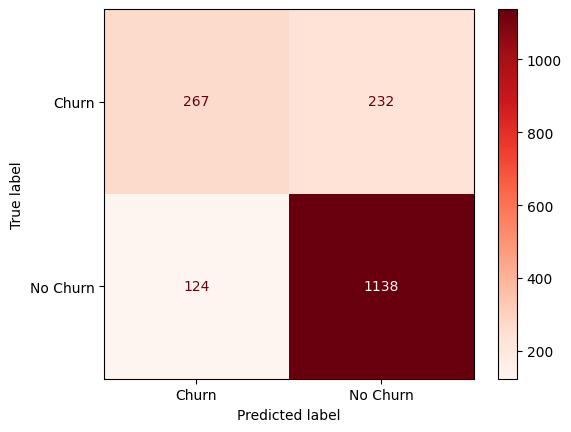

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
LR_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1=Churn, 0=No Churn

# Visualize
LR_disp = ConfusionMatrixDisplay(confusion_matrix=LR_cm, display_labels=["Churn", "No Churn"])
LR_disp.plot(cmap='Reds')

In [19]:
accuracy

0.7978421351504826

In [20]:
# Feature importance for logistic regression
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lg.coef_[0]
}).sort_values(by="Importance", ascending=False)



In [21]:
feature_importance

,Feature,Importance
17,MonthlyCharges,0.695542
18,TotalCharges,0.597012
7,InternetService,0.181070
15,PaperlessBilling,0.144094
1,SeniorCitizen,0.093860
6,MultipleLines,0.088942
16,PaymentMethod,0.048890
12,StreamingTV,0.021778
2,Partner,0.006126
0,gender,-0.000716


## Training a Random Forest Classification model

In [22]:
# Defining X and y for Random Forest Classifier
rf_X = telco_df.drop(columns=['Churn'])
rf_y = telco_df['Churn']

# Splitting the dataset into training and testing data
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, random_state=123)



In [23]:
# Training the model 
rfc = RandomForestClassifier(n_estimators=500, random_state=123)
rfc.fit(rf_X_train, rf_y_train)

RandomForestClassifier(n_estimators=500, random_state=123)

In [24]:
# Predicting using the trained model
rf_y_pred = rfc.predict(rf_X_test)

# Compute metrics
rf_accuracy = accuracy_score(rf_y_test, rf_y_pred)
rf_recall = recall_score(rf_y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(rf_y_test, rf_y_pred)
rf_class_report = classification_report(rf_y_test, rf_y_pred, output_dict=True)

Confusion matrix for Random Forest Classifier

In [25]:
rf_conf_matrix

array([[1151,  111],
       [ 265,  234]])

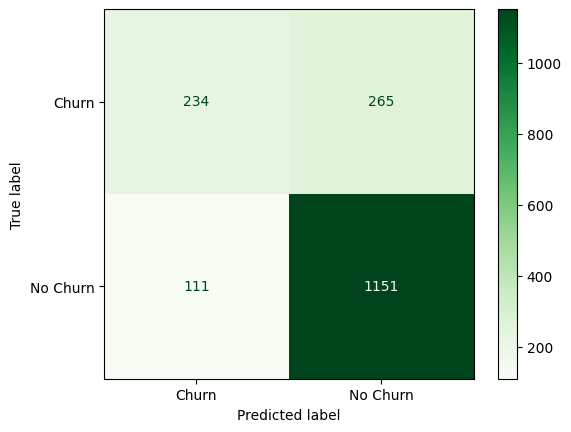

In [26]:
# Get confusion matrix
RF_cm = confusion_matrix(rf_y_test, rf_y_pred, labels=[1, 0])  # 1=Churn, 0=No Churn

# Visualize
RF_disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm, display_labels=["Churn", "No Churn"])
RF_disp.plot(cmap='Greens')

In [27]:
rf_accuracy

0.7864849517319704

In [28]:
# Displaying feature importance
importance = rfc.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)
rf_feature_importance

,Feature,Importance
18,TotalCharges,0.188039
17,MonthlyCharges,0.176769
4,tenure,0.164903
14,Contract,0.073750
8,OnlineSecurity,0.051296
16,PaymentMethod,0.050625
11,TechSupport,0.039585
9,OnlineBackup,0.027201
0,gender,0.027175
7,InternetService,0.026812


## Training a XGBoost classifier model

In [29]:
# Converting 'TotalCharges' to float
telco_df['TotalCharges']= pd.to_numeric(telco_df['TotalCharges'], downcast='float', errors='coerce')

# Fill NaN values in 'TotalCharges'
telco_df['TotalCharges'].fillna(0, inplace=True)



C:\Users\stupi\AppData\Local\Temp\ipykernel_28004\1144629876.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco_df['TotalCharges'].fillna(0, inplace=True)


In [30]:
# Defining X and y variables for XGBoost classifier
XG_X = telco_df.drop(columns=['Churn'])
XG_y = telco_df['Churn']

# Splitting the data into training and testing 
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(XG_X, XG_y, random_state=123)

In [31]:
# Initialising the XGBoost model
XG_model = XGBClassifier(objective='binary:logistic',
                         eval_metric='logloss',
                         use_label_encoder=False,
                         random_state=123)

# Train model
XG_model.fit(XG_X_train, XG_y_train)

c:\Users\stupi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Making prediction & evaluate model

In [32]:
# Predict test data
XG_y_pred = XG_model.predict(XG_X_test)

# Evaluate model
XG_accuracy = accuracy_score(XG_y_test, XG_y_pred)
XG_recall = recall_score(XG_y_test, XG_y_pred)
XG_conf_matrix = confusion_matrix(XG_y_test, XG_y_pred)
XG_class_report = classification_report(XG_y_test, XG_y_pred, output_dict=True)

Feature importance from XGBoost

In [33]:
# Get feature importance
importance = XG_model.feature_importances_

# Converting it to pandas dataframe
XG_feature_importance = pd.DataFrame({'Feature': XG_X_train.columns,
                                      "Importance": importance
                                      }).sort_values(by="Importance", ascending=False)
XG_feature_importance

,Feature,Importance
14,Contract,0.404488
7,InternetService,0.156907
8,OnlineSecurity,0.110258
11,TechSupport,0.029472
4,tenure,0.027682
5,PhoneService,0.026613
1,SeniorCitizen,0.022211
15,PaperlessBilling,0.021819
17,MonthlyCharges,0.021447
13,StreamingMovies,0.021300


Confusion matrix for XGBoost Classifier

In [34]:
XG_conf_matrix

array([[1114,  148],
       [ 242,  257]])

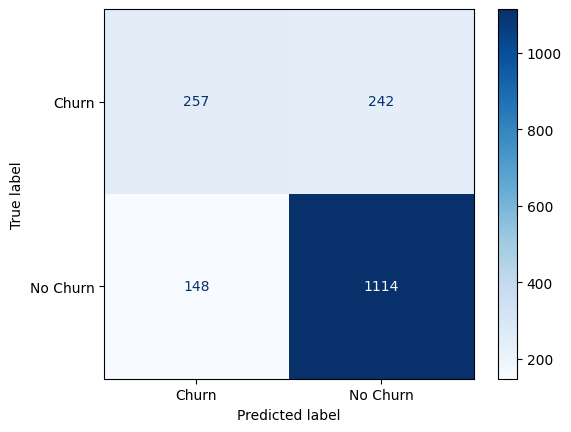

In [35]:
# Get confusion matrix
XG_cm = confusion_matrix(XG_y_test, XG_y_pred, labels=[1, 0])  # 1=Churn, 0=No Churn

# Visualize
XG_disp = ConfusionMatrixDisplay(confusion_matrix=XG_cm, display_labels=["Churn", "No Churn"])
XG_disp.plot(cmap='Blues')

In [36]:
XG_accuracy

0.778534923339012

## To refine the XGBoost model by selecting the features and balancing the data

In [37]:
# Defining X and y variables for XGBoost classifier
Xxg = telco_df[['Contract', 'InternetService', 'PhoneService', 'MonthlyCharges', 'tenure', 'PaymentMethod','OnlineSecurity', 'TechSupport', 'OnlineBackup']]
yxg = telco_df['Churn']

# Splitting the data into training and testing 
Xxg_train, Xxg_test, yxg_train, yxg_test = train_test_split(Xxg, yxg, random_state=123)

In [38]:
# Compute scale_pos_weight (ratio of non-churn to churn)
scale_pos_weight = (yxg_train.value_counts()[0]/yxg_train.value_counts()[1])

modelxg = XGBClassifier(objective='binary:logistic',
                         eval_metric='logloss',
                         use_label_encoder=False,
                         scale_pos_weight=scale_pos_weight,
                         max_depth=5,
                         learning_rate=0.1,
                         n_estimators=200,
                         gamma=3,
                         min_child_weight=1,
                         random_state=123)

modelxg.fit(Xxg_train,yxg_train)

c:\Users\stupi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
y_predxg = modelxg.predict(Xxg_test)

accuracyxg = accuracy_score(yxg_test, y_predxg)
recallxg = recall_score(yxg_test, y_predxg)
conf_matrixxg = confusion_matrix(yxg_test, y_predxg)
class_reportxg = classification_report(yxg_test, y_predxg, output_dict=True)

In [40]:
conf_matrixxg

array([[921, 341],
       [ 98, 401]])

Confusion matrix

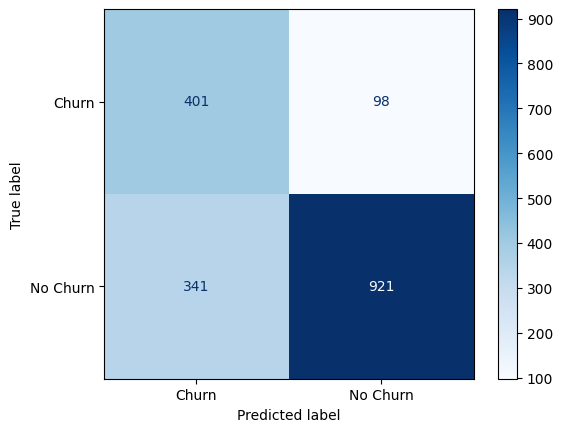

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
cm = confusion_matrix(yxg_test, y_predxg, labels=[1, 0])  # 1=Churn, 0=No Churn

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Churn", "No Churn"])
disp.plot(cmap='Blues')


In [42]:
accuracyxg

0.750709823963657

In [43]:
recallxg

0.8036072144288577

In [44]:
class_reportxg['1']

{'precision': 0.5404312668463612,
 'recall': 0.8036072144288577,
 'f1-score': 0.6462530217566479,
 'support': 499.0}

Feature importance for the refined XGBoost model

In [45]:
# Get feature importance
importance = modelxg.feature_importances_

# Converting it to pandas dataframe
featurexg_importance = pd.DataFrame({'Feature': Xxg_train.columns,
                                      "Importance": importance
                                      }).sort_values(by="Importance", ascending=False)
featurexg_importance



,Feature,Importance
0,Contract,0.554996
6,OnlineSecurity,0.161351
1,InternetService,0.082023
7,TechSupport,0.055961
4,tenure,0.037471
3,MonthlyCharges,0.030787
8,OnlineBackup,0.028493
2,PhoneService,0.026144
5,PaymentMethod,0.022774


In [46]:
import pickle 
import joblib

Saving the XGBoost model into joblib

In [47]:
joblib.dump(modelxg, 'xgboost_churn_model.joblib')

['xgboost_churn_model.joblib']

In [48]:
import shap

In [53]:
shap.initjs()

In [56]:
explainer = shap.Explainer(modelxg, Xxg_train)
shap_values = explainer(Xxg_test)

shap.force_plot(explainer.expected_value, shap_values[0], Xxg_test.iloc[0], matplotlib=True)

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [57]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'